# TED Talks- Exploratory Data Analysis

You can download the data [here](https://www.kaggle.com/rounakbanik/ted-talks/data)

## Import the libraries

In [1]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
ted_data = pd.read_csv("ted_main.csv")
ted_data.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [3]:
ted_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2550 non-null   int64 
 1   description         2550 non-null   object
 2   duration            2550 non-null   int64 
 3   event               2550 non-null   object
 4   film_date           2550 non-null   int64 
 5   languages           2550 non-null   int64 
 6   main_speaker        2550 non-null   object
 7   name                2550 non-null   object
 8   num_speaker         2550 non-null   int64 
 9   published_date      2550 non-null   int64 
 10  ratings             2550 non-null   object
 11  related_talks       2550 non-null   object
 12  speaker_occupation  2544 non-null   object
 13  tags                2550 non-null   object
 14  title               2550 non-null   object
 15  url                 2550 non-null   object
 16  views               2550

## Let's have a look at missing values.

In [4]:
ted_data.isnull().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

## Identifying object / categorical values and continuous values

In [5]:
ted_data.dtypes

comments               int64
description           object
duration               int64
event                 object
film_date              int64
languages              int64
main_speaker          object
name                  object
num_speaker            int64
published_date         int64
ratings               object
related_talks         object
speaker_occupation    object
tags                  object
title                 object
url                   object
views                  int64
dtype: object

In [6]:
ted_data.name.nunique()

2550

### Let's drop the name column

In [7]:
ted_data = ted_data.drop(['name'], axis = 1)
ted_data.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'num_speaker', 'published_date', 'ratings',
       'related_talks', 'speaker_occupation', 'tags', 'title', 'url', 'views'],
      dtype='object')

### Converting the unix format of date columns to datetime format

In [8]:
from datetime import datetime

def convert(x):
    return pd.to_datetime(x,unit='s', origin='unix')

# Let's now apply this function
ted_data['film_date'] = ted_data['film_date'].apply(convert)
ted_data['published_date'] = ted_data['published_date'].apply(convert)
ted_data.head(3)

,comments,description,duration,event,film_date,languages,main_speaker,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,2006-02-25,43,Al Gore,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,2006-02-24,26,David Pogue,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292


In [9]:
ted_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   comments            2550 non-null   int64         
 1   description         2550 non-null   object        
 2   duration            2550 non-null   int64         
 3   event               2550 non-null   object        
 4   film_date           2550 non-null   datetime64[ns]
 5   languages           2550 non-null   int64         
 6   main_speaker        2550 non-null   object        
 7   num_speaker         2550 non-null   int64         
 8   published_date      2550 non-null   datetime64[ns]
 9   ratings             2550 non-null   object        
 10  related_talks       2550 non-null   object        
 11  speaker_occupation  2544 non-null   object        
 12  tags                2550 non-null   object        
 13  title               2550 non-null   object      

**Some columns contain data in dictionary and list format. We will not look at those column yet as our aim here is to find out the popular speaker and when the talks publish the most.**

## EDA

### 1.Popular Speaker

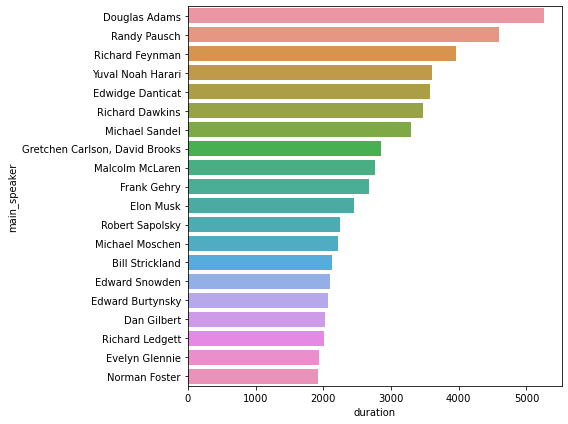

In [10]:
#Lets see who talked for a long duration - top 20
plt.figure(figsize=(8,6))
ax = sns.barplot(x= "duration", y= "main_speaker", data= ted_data.sort_values(by='duration', ascending= False)[:20])
plt.tight_layout()

### Let's see which video got the most views

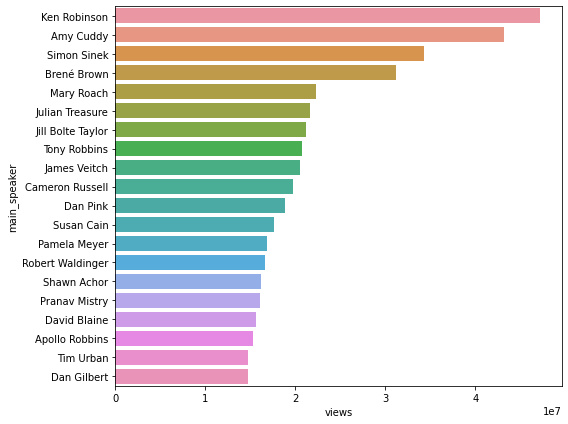

In [11]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x="views", y="main_speaker", data=ted_data.sort_values(by='views', ascending=False)[:20])
plt.tight_layout()

### Are views and duration related? Let's check it out!

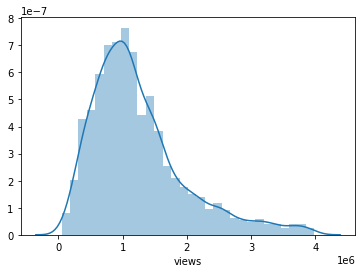

In [19]:
#let's see the distribution of views
ax = sns.distplot(ted_data[ted_data['views'] < 0.4e7]['views'], bins=30)

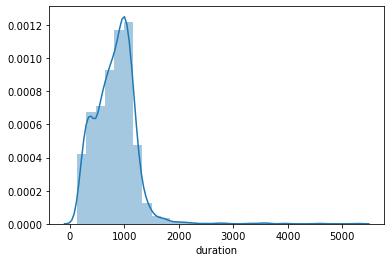

In [20]:
#let's see the distribution of duration
ax = sns.distplot(ted_data[ted_data['duration'] < 0.4e7]['duration'], bins=30)

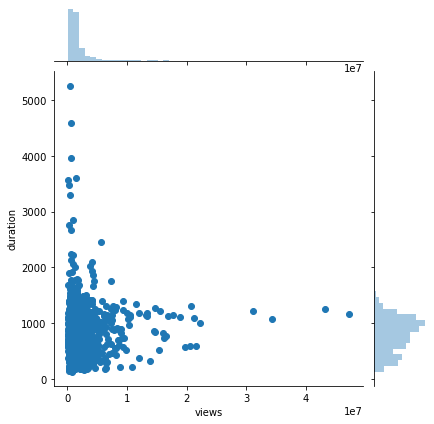

In [18]:
# Let's see if views and duration have any correlation
ax = sns.jointplot(x='views', y='duration', data=ted_data)

**From the above joint plot, it looks like there's no relationship (correlation) b/w views and duration.**

### There's a comments column and there is a possibility that most popular video might get more comments. But before finding the popular speaker and his/her video, let’s see if comments and views have any relationship?

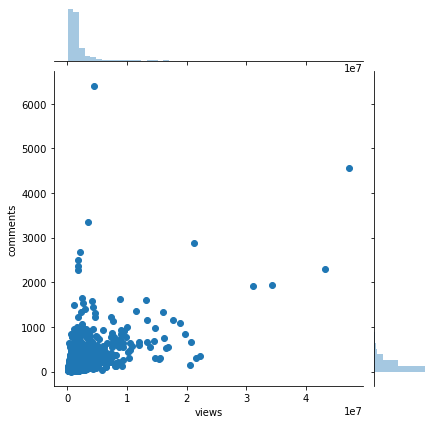

In [22]:
ax = sns.jointplot(x = 'views', y = 'comments', data = ted_data)

**Looks like there's a strong relationship between views and comments. The popular videos tends to have more comments.**

**Now, we know that comments and views make any video on Ted talk popular. So, Let’s find out who is the most popular speaker.**

### Popular speaker by comments

In [28]:
ted_data[['title', 'main_speaker','views', 'comments', 'duration']].sort_values('comments', ascending= False).head(10)

,title,main_speaker,views,comments,duration
96,Militant atheism,Richard Dawkins,4374792,6404,1750
0,Do schools kill creativity?,Ken Robinson,47227110,4553,1164
644,Science can answer moral questions,Sam Harris,3433437,3356,1386
201,My stroke of insight,Jill Bolte Taylor,21190883,2877,1099
1787,How do you explain consciousness?,David Chalmers,2162764,2673,1117
954,Taking imagination seriously,Janet Echelman,1832930,2492,566
840,On reading the Koran,Lesley Hazleton,1847256,2374,573
1346,Your body language may shape who you are,Amy Cuddy,43155405,2290,1262
661,The danger of science denial,Michael Specter,1838628,2272,1141
677,How great leaders inspire action,Simon Sinek,34309432,1930,1084


### Popular speaker by views

In [29]:
ted_data[['title', 'main_speaker','views', 'comments', 'duration']].sort_values('views', ascending= False).head(10)

,title,main_speaker,views,comments,duration
0,Do schools kill creativity?,Ken Robinson,47227110,4553,1164
1346,Your body language may shape who you are,Amy Cuddy,43155405,2290,1262
677,How great leaders inspire action,Simon Sinek,34309432,1930,1084
837,The power of vulnerability,Brené Brown,31168150,1927,1219
452,10 things you didn't know about orgasm,Mary Roach,22270883,354,1003
1776,How to speak so that people want to listen,Julian Treasure,21594632,297,598
201,My stroke of insight,Jill Bolte Taylor,21190883,2877,1099
5,Why we do what we do,Tony Robbins,20685401,672,1305
2114,This is what happens when you reply to spam email,James Veitch,20475972,150,588
1416,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,19787465,846,577


### 2. Months - Talk show *conducted / filmed* the most

In [38]:
talk_month = pd.DataFrame(ted_data['film_date'].map(lambda x: x.month).value_counts()).reset_index()
talk_month.columns = ['month', 'talks']
talk_month.head()

,month,talks
0,2,601
1,3,397
2,6,270
3,7,253
4,11,232


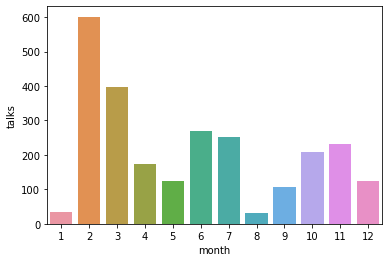

In [33]:
ax = sns.barplot(x= 'month', y= 'talks', data= talk_month)

**Looks like, in the month of February, highest number of shows are conducted.**

### Similarly, Months - Talk show *published* the most

In [49]:
publish_month = pd.DataFrame(ted_data['published_date'].map(lambda x : x.month).value_counts()).reset_index()
publish_month.columns = ['month', 'talks']
publish_month.head()

,month,talks
0,4,256
1,9,232
2,5,229
3,3,228
4,6,228


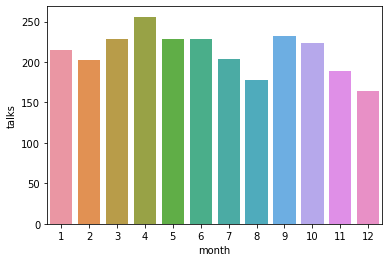

In [55]:
ax = sns.barplot(x = 'month', y = 'talks', data = publish_month)

**Looks like, the shows are published every month with rough average of 200, which makes sense.**